In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\Users\72526\SuperStore_Orders.csv"

df = pd.read_csv(file_path, encoding="latin1")

shape = df.shape
head = df.head()
info = df.dtypes

shape, head, info

((51290, 21),
           order_id  order_date   ship_date       ship_mode    customer_name  \
 0     AG-2011-2040  01-01-2011  06-01-2011  Standard Class  Toby Braunhardt   
 1    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
 2     HU-2011-1220  01-01-2011  05-01-2011    Second Class    Annie Thurman   
 3  IT-2011-3647632  01-01-2011  05-01-2011    Second Class     Eugene Moren   
 4    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
 
        segment            state    country  market   region  ...  \
 0     Consumer      Constantine    Algeria  Africa   Africa  ...   
 1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
 2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
 3  Home Office        Stockholm     Sweden      EU    North  ...   
 4     Consumer  New South Wales  Australia    APAC  Oceania  ...   
 
           category sub_category                 product_name sales quantity  \
 0  Offi

In [4]:
import pandas as pd
import numpy as np

df_new = pd.read_csv(file_path, encoding="latin1")

df_new['sales'] = df_new['sales'].replace(r'[^0-9.\-]', '', regex=True)
df_new['sales'] = pd.to_numeric(df_new['sales'], errors='coerce')

df_new['order_date'] = pd.to_datetime(df_new['order_date'], errors='coerce', dayfirst=True)
df_new['ship_date'] = pd.to_datetime(df_new['ship_date'], errors='coerce', dayfirst=True)

desc_stats = df_new[['sales','quantity','discount','profit','shipping_cost']].describe()

category_stats = df_new.groupby("category")[['sales','profit']].describe()
segment_stats = df_new.groupby("segment")[['sales','profit']].describe()
region_stats = df_new.groupby("region")[['sales','profit']].describe()

print("Descriptive Statistics (Overall)", desc_stats)


Descriptive Statistics (Overall)               sales      quantity      discount        profit  shipping_cost
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
mean     246.498440      3.476545      0.142908     28.641740      26.375915
std      487.567175      2.278766      0.212280    174.424113      57.296804
min        0.000000      1.000000      0.000000  -6599.978000       0.000000
25%       31.000000      2.000000      0.000000      0.000000       2.610000
50%       85.000000      3.000000      0.000000      9.240000       7.790000
75%      251.000000      5.000000      0.200000     36.810000      24.450000
max    22638.000000     14.000000      0.850000   8399.976000     933.570000


In [5]:
import numpy as np
import pandas as pd


PATH = "/mnt/data/SuperStore_Orders.csv"   
df = pd.read_csv(file_path, encoding="latin1")

df["sales"] = pd.to_numeric(df["sales"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True), errors="coerce")
for col in ["quantity", "discount", "profit", "shipping_cost"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce", dayfirst=True)
df["ship_date"]  = pd.to_datetime(df["ship_date"],  errors="coerce", dayfirst=True)

numeric_cols = ["sales", "quantity", "discount", "profit", "shipping_cost"]

def manual_stats(series: pd.Series) -> pd.Series:
    s = series.dropna().astype(float)
    return pd.Series({
        "count":   int(s.shape[0]),
        "missing": int(series.isna().sum()),
        "mean":    float(s.mean()) if len(s) else np.nan,
        "std":     float(s.std(ddof=1)) if len(s) > 1 else np.nan,
        "min":     float(s.min()) if len(s) else np.nan,
        "q25":     float(s.quantile(0.25)) if len(s) else np.nan,
        "median":  float(s.quantile(0.50)) if len(s) else np.nan,
        "q75":     float(s.quantile(0.75)) if len(s) else np.nan,
        "max":     float(s.max()) if len(s) else np.nan,
    })

overall_stats = pd.concat({col: manual_stats(df[col]) for col in numeric_cols}, axis=1)
print("\n=== Overall numeric stats (manual) ===")
print(overall_stats)

def group_summary(df: pd.DataFrame, by: str) -> pd.DataFrame:
    out = (
        df.groupby(by)
          .agg(
              orders=("order_id", "count"),
              sales_total=("sales", "sum"),
              sales_mean=("sales", "mean"),
              profit_total=("profit", "sum"),
              profit_mean=("profit", "mean"),
          )
          .sort_values("sales_total", ascending=False)
    )
    out["margin_pct"] = (out["profit_total"] / out["sales_total"]) * 100
    return out

category_summary = group_summary(df, "category")
segment_summary  = group_summary(df, "segment")
region_summary   = group_summary(df, "region")

print("\n=== By Category (orders, totals, means, margin %) ===")
print(category_summary)

print("\n=== By Segment (orders, totals, means, margin %) ===")
print(segment_summary)

print("\n=== By Region (orders, totals, means, margin %) ===")
print(region_summary)



=== Overall numeric stats (manual) ===
                sales      quantity      discount        profit  shipping_cost
count    51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
missing      0.000000      0.000000      0.000000      0.000000       0.000000
mean       246.498440      3.476545      0.142908     28.641740      26.375915
std        487.567175      2.278766      0.212280    174.424113      57.296804
min          0.000000      1.000000      0.000000  -6599.978000       0.000000
q25         31.000000      2.000000      0.000000      0.000000       2.610000
median      85.000000      3.000000      0.000000      9.240000       7.790000
q75        251.000000      5.000000      0.200000     36.810000      24.450000
max      22638.000000     14.000000      0.850000   8399.976000     933.570000

=== By Category (orders, totals, means, margin %) ===
                 orders  sales_total  sales_mean  profit_total  profit_mean  \
category                            

Q1 (25th pct) sales ≈ 31
Q3 (75th pct) sales ≈ 251
Rows at/near Q1: 358   | Rows at/near Q3: 36

Top products at/near Q1:
                                         product_name  count
0                            Boston Pens, Fluorescent     10
1                               BIC Pens, Fluorescent      9
2                               Ibico Binder, Economy      9
3                               Tenex Box, Wire Frame      8
4                            Cardinal Binder, Durable      7
5                                Rogers Folders, Blue      7
6       Green Bar Computer Printout Paper, Multicolor      6
7                          Rogers Folders, Industrial      6
8                                             Staples      5
9                                 Smead Folders, Blue      5
10                    Logitech Flash Drive, Bluetooth      4
11                             Accos Staples, 12 Pack      4
12        SanDisk Computer Printout Paper, Multicolor      4
13                    St

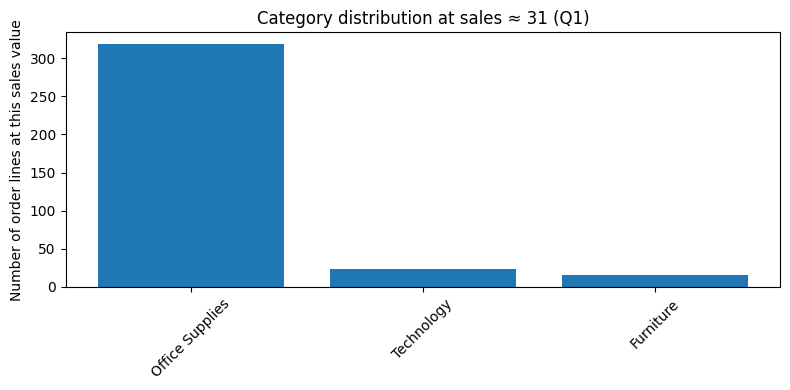

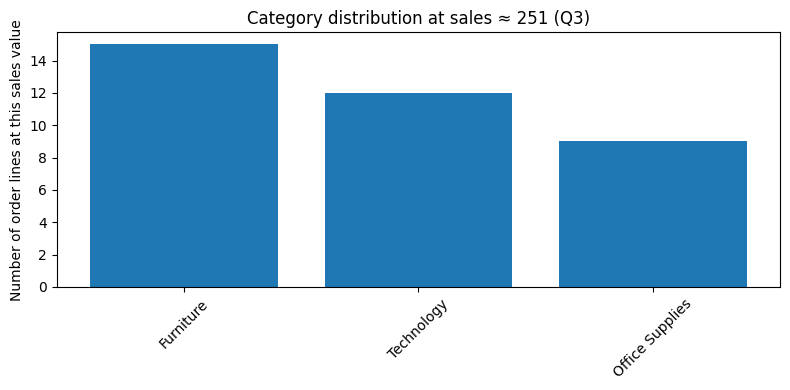

In [6]:
# --- Quantile item finder & binner (no seaborn) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 0) Load & basic cleaning
CANDIDATES = [
    r"C:\path\to\SuperStore_Orders.csv",          # <- put your local path here
    r"C:\Users\72526\SuperStore_Orders.csv",      # <- example
    "/mnt/data/SuperStore_Orders.csv",            # <- fallback (uploaded file in this chat)
]
for p in CANDIDATES:
    if Path(p).exists():
        PATH = p
        break
else:
    raise FileNotFoundError("Update CANDIDATES to point at your SuperStore_Orders.csv")

df = pd.read_csv(PATH, encoding="latin1")

# Clean 'sales' to numeric
df["sales"] = pd.to_numeric(df["sales"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True),
                            errors="coerce")

# 1) Helper: slice rows around a target value
def slice_sales_at_value(data: pd.DataFrame, value: float, *, tol: float=None, window: float=None) -> pd.DataFrame:
    s = data["sales"]
    if window is not None:
        mask = s.between(value - window, value + window, inclusive="both")
    elif tol is not None:
        mask = np.isclose(s, value, atol=tol)
    else:
        mask = (s == value)
    return data.loc[mask].copy()

# 2) Helper: aggregate counts (bin) by category / sub_category / product_name
def build_bins(df_slice: pd.DataFrame) -> dict:
    out = {}
    out["by_category"] = (
        df_slice.groupby("category", dropna=False)
                .size().sort_values(ascending=False)
                .rename("count").reset_index()
    )
    out["by_subcategory"] = (
        df_slice.groupby(["category", "sub_category"], dropna=False)
                .size().sort_values(ascending=False)
                .rename("count").reset_index()
    )
    out["by_product"] = (
        df_slice.groupby("product_name", dropna=False)
                .size().sort_values(ascending=False)
                .rename("count").reset_index()
    )
    return out

# 3) Quantiles
q25 = float(df["sales"].quantile(0.25))  # ~ 31
q75 = float(df["sales"].quantile(0.75))  # ~ 251

print(f"Q1 (25th pct) sales ≈ {q25:.0f}")
print(f"Q3 (75th pct) sales ≈ {q75:.0f}")

# Choose ONE of the modes below:
MODE = "tolerance"   # options: "exact", "tolerance", "window"
TOL = 0.5            # used if MODE == "tolerance"
WIN = None           # e.g., 5.0 for ±5 range if MODE == "window"

# 4) Get slices at Q1 and Q3
if MODE == "exact":
    eq25 = slice_sales_at_value(df, q25, tol=None, window=None)
    eq75 = slice_sales_at_value(df, q75, tol=None, window=None)
elif MODE == "tolerance":
    eq25 = slice_sales_at_value(df, q25, tol=TOL)
    eq75 = slice_sales_at_value(df, q75, tol=TOL)
elif MODE == "window":
    eq25 = slice_sales_at_value(df, q25, window=WIN)
    eq75 = slice_sales_at_value(df, q75, window=WIN)
else:
    raise ValueError("MODE must be 'exact', 'tolerance', or 'window'.")

print(f"Rows at/near Q1: {len(eq25)}   | Rows at/near Q3: {len(eq75)}")

# 5) Build binned summaries
bins25 = build_bins(eq25)
bins75 = build_bins(eq75)

# Show top products (binned by same name)
print("\nTop products at/near Q1:")
print(bins25["by_product"].head(20))

print("\nTop products at/near Q3:")
print(bins75["by_product"].head(20))

print("\nCategory counts at/near Q1:")
print(bins25["by_category"])

print("\nCategory counts at/near Q3:")
print(bins75["by_category"])

print("\nTop (category, sub_category) at/near Q1:")
print(bins25["by_subcategory"].head(20))

print("\nTop (category, sub_category) at/near Q3:")
print(bins75["by_subcategory"].head(20))

# 6) Plot category distributions at Q1 and Q3
def plot_category_counts(cat_df: pd.DataFrame, title: str):
    if cat_df.empty:
        print(f"[WARN] No rows to plot for: {title}")
        return
    x = cat_df["category"].astype(str)
    y = cat_df["count"].values

    plt.figure(figsize=(8, 4))
    plt.bar(x, y)
    plt.title(title)
    plt.ylabel("Number of order lines at this sales value")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_category_counts(bins25["by_category"], f"Category distribution at sales ≈ {q25:.0f} (Q1)")
plot_category_counts(bins75["by_category"], f"Category distribution at sales ≈ {q75:.0f} (Q3)")



Berdasarkan data diatas ditemukan bahwa dalam persenan kuantil Q1 dalam "sales" ditemukan dominasi oleh office supplies. dan kuantil Q3 terbagi rata. Hal ini menunjukkan bahwa penjualan sales di dominasi oleh office supplies seperti
1. Boston Pens, Fluorescent — 10 lines 
2. BIC Pens, Fluorescent — 9 lines 
3. Ibico Binder, Economy — 9 lines 
4. Tenex Box, Wire Frame — 8 lines 
5. Rogers Folders, Blue — 7 lines 


== Country shipping cost summary (ALL) ==
                          orders  avg_shipping  median_shipping  p75_shipping  \
country                                                                         
Taiwan                        14       155.661           21.605       163.295   
Chad                           2       148.970          148.970       222.525   
Lesotho                        6       135.650           21.310       284.628   
Montenegro                     4        93.938           39.840       120.083   
Slovenia                       3        61.220           28.160        89.095   
Republic of the Congo          6        59.303           29.515        39.645   
Central African Republic       7        57.626           16.590        71.310   
Namibia                        9        50.370           12.810        22.110   
Bangladesh                   163        46.403           16.710        50.020   
Estonia                       13        46.070            7.180   

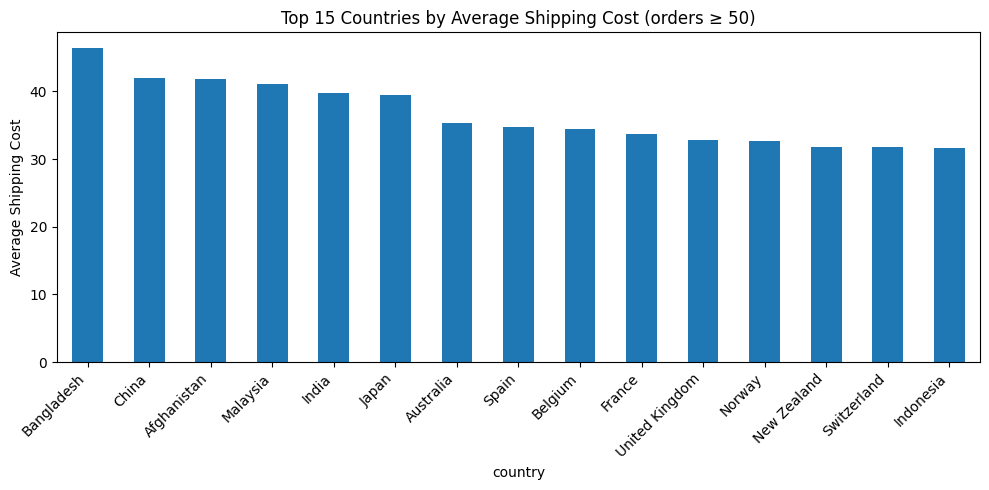

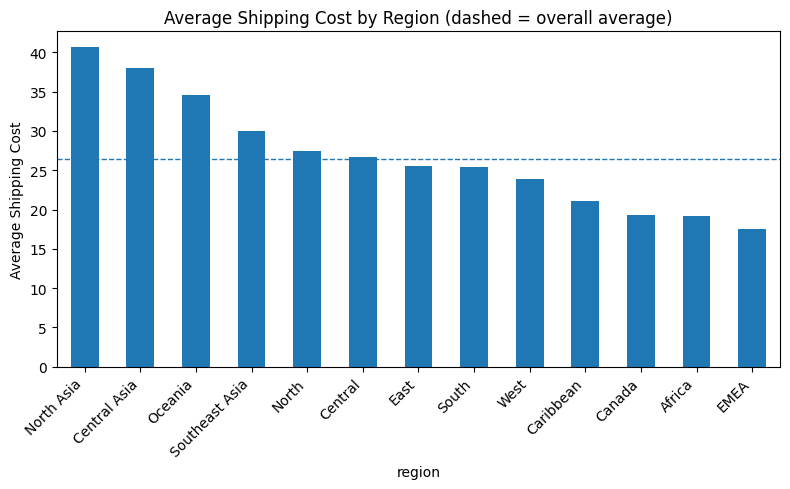

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Load data (change PATH if needed)
PATH = "/mnt/data/SuperStore_Orders.csv"  # or your local CSV path
df = pd.read_csv(file_path, encoding="latin1")

# Ensure numeric shipping_cost
df["shipping_cost"] = pd.to_numeric(df["shipping_cost"], errors="coerce")

# 1) Country-level shipping cost summary
country_ship = (
    df.groupby("country", dropna=False)
      .agg(
          orders=("order_id", "count"),
          avg_shipping=("shipping_cost", "mean"),
          median_shipping=("shipping_cost", "median"),
          p75_shipping=("shipping_cost", lambda s: s.quantile(0.75)),
          total_shipping=("shipping_cost", "sum"),
      )
      .sort_values("avg_shipping", ascending=False)
)

# Optional: filter to avoid small-sample outliers
MIN_ORDERS = 50
country_ship_filtered = country_ship.query("orders >= @MIN_ORDERS").copy()

print("\n== Country shipping cost summary (ALL) ==")
print(country_ship.round(3).head(20))
print(f"\n== Country shipping cost summary (orders >= {MIN_ORDERS}) ==")
print(country_ship_filtered.round(3).head(20))

# 2) Region-level shipping cost summary + compare to overall average
overall_avg = df["shipping_cost"].mean()

region_ship = (
    df.groupby("region", dropna=False)
      .agg(
          orders=("order_id", "count"),
          avg_shipping=("shipping_cost", "mean"),
          median_shipping=("shipping_cost", "median"),
          p75_shipping=("shipping_cost", lambda s: s.quantile(0.75)),
          total_shipping=("shipping_cost", "sum"),
      )
      .sort_values("avg_shipping", ascending=False)
)

region_ship["delta_from_overall"] = region_ship["avg_shipping"] - overall_avg
region_ship["abs_delta"] = region_ship["delta_from_overall"].abs()
region_closest_to_overall = region_ship["abs_delta"].idxmin()

print("\n== Region shipping cost summary (with distance to overall avg) ==")
print(region_ship.round(3))
print(f"\nOverall average shipping cost: {overall_avg:.3f}")
print(f"Region closest to overall average: {region_closest_to_overall} "
      f"({region_ship.loc[region_closest_to_overall, 'avg_shipping']:.3f})")

# 3) Plots
# Top-N countries by average shipping cost (filtered for min orders)
TOP_N = 15
plt.figure(figsize=(10, 5))
country_ship_filtered.head(TOP_N)["avg_shipping"].plot(kind="bar")
plt.title(f"Top {TOP_N} Countries by Average Shipping Cost (orders ≥ {MIN_ORDERS})")
plt.ylabel("Average Shipping Cost")
plt.xlabel("country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Region average with overall average line
plt.figure(figsize=(8, 5))
region_ship["avg_shipping"].plot(kind="bar")
plt.axhline(overall_avg, linestyle="--", linewidth=1)
plt.title("Average Shipping Cost by Region (dashed = overall average)")
plt.ylabel("Average Shipping Cost")
plt.xlabel("region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Data dalam shipping cost menunjukkan bahwa median memiliki nilai rentang 7-8 USD. dan average memiliki nilai 26.375915. Hal ini menujukkan bahwa 50% data memiliki shipping cost dibawah 7. Setelah di cek negara tujuan yang mendekati average adalah negara negara dari EMEA atau ASIA, yang menunjukkan bahwa shipping cost tinggi berpengaruh dengan nilai profit dari region yang dituju, berdasarkan region profit South east asia dna EMEA adalah yang terendah

Same-Day shipping by region: count, share, and average costs             region  same_day_orders  same_day_avg_shipping  \
0          Central              568                 43.882   
1            South              341                 41.976   
2             EMEA              300                 27.114   
3           Africa              257                 34.235   
4            North              246                 44.126   
5          Oceania              205                 52.630   
6             West              185                 41.880   
7             East              155                 54.804   
8   Southeast Asia              145                 48.328   
9       North Asia              106                 54.513   
10       Caribbean               85                 36.442   
11    Central Asia               79                 68.367   
12          Canada               29                 21.777   

    same_day_median_shipping  same_day_p75_shipping  same_day_total_sh

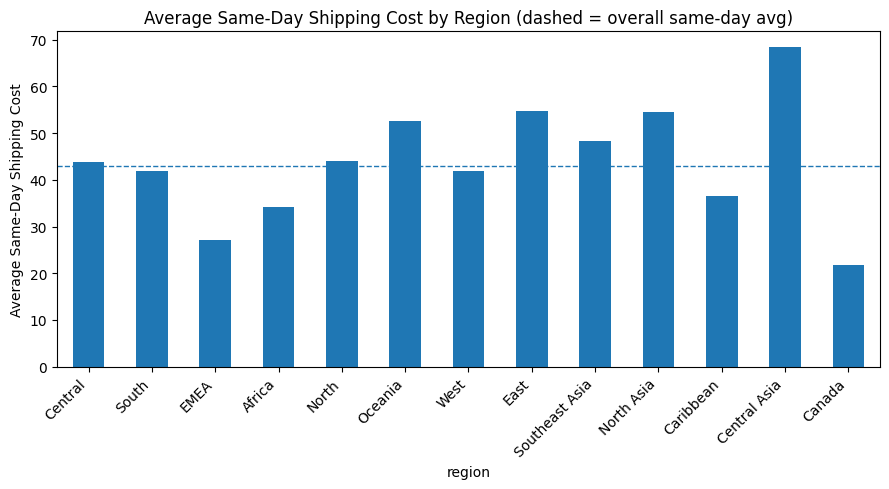

np.float64(42.93745279526102)

In [11]:
# Normalize ship_mode and filter Same Day
ship = df["ship_mode"].astype(str).str.strip().str.lower()
same_day_df = df[ship.eq("same day")].copy()

# Ensure numeric shipping_cost
same_day_df["shipping_cost"] = pd.to_numeric(same_day_df["shipping_cost"], errors="coerce")

# Counts and averages per region for Same Day
same_day_region = (
    same_day_df.groupby("region")
               .agg(
                   same_day_orders=("order_id", "count"),
                   same_day_avg_shipping=("shipping_cost", "mean"),
                   same_day_median_shipping=("shipping_cost", "median"),
                   same_day_p75_shipping=("shipping_cost", lambda s: s.quantile(0.75)),
                   same_day_total_shipping=("shipping_cost", "sum")
               )
               .sort_values("same_day_orders", ascending=False)
)

# Add share of orders within each region
region_totals = df.groupby("region").agg(total_orders=("order_id", "count"))
same_day_region = same_day_region.join(region_totals, how="left")
same_day_region["same_day_share_%"] = (same_day_region["same_day_orders"] / same_day_region["total_orders"] * 100)

# Show interactive table
print(
    "Same-Day shipping by region: count, share, and average costs",
    same_day_region.reset_index().round(3)
)

# Plot average Same-Day shipping cost by region
overall_same_day_avg = same_day_df["shipping_cost"].mean()

plt.figure(figsize=(9,5))
same_day_region["same_day_avg_shipping"].plot(kind="bar")
plt.axhline(overall_same_day_avg, linestyle="--", linewidth=1)  # overall same-day avg
plt.title("Average Same-Day Shipping Cost by Region (dashed = overall same-day avg)")
plt.ylabel("Average Same-Day Shipping Cost")
plt.xlabel("region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

overall_same_day_avg


Alasan mengapa nilai average shipping cost north, central, wesst, east, dan south tinggi adalah banyaknya pengguna same day dengan price average 40. Berdasarkan data count negara yang menggunakan same day region central, west, east, north, dan south adalah yang tertinggi dan menyebabkan average shipping day region mereka tinggi.

Q3(profit) threshold ≈ 36.81
High-profit rows: 12819 / 51290

Top items by count of high-profit order lines:
                                           product_name         category  \
678                       Eldon File Cart, Single Width  Office Supplies   
2127                      Tenex File Cart, Single Width  Office Supplies   
1749                     Rogers File Cart, Single Width  Office Supplies   
140                        Apple Smart Phone, Full Size       Technology   
542                        Cisco Smart Phone, Full Size       Technology   
1560                       Nokia Smart Phone, Full Size       Technology   
482                     Cardinal Binding Machine, Clear  Office Supplies   
366                         Brother Copy Machine, Color       Technology   
1120         Hon Executive Leather Armchair, Adjustable        Furniture   
2005                          Smead Lockers, Industrial  Office Supplies   
1151                            Hon Swivel Stool, Black

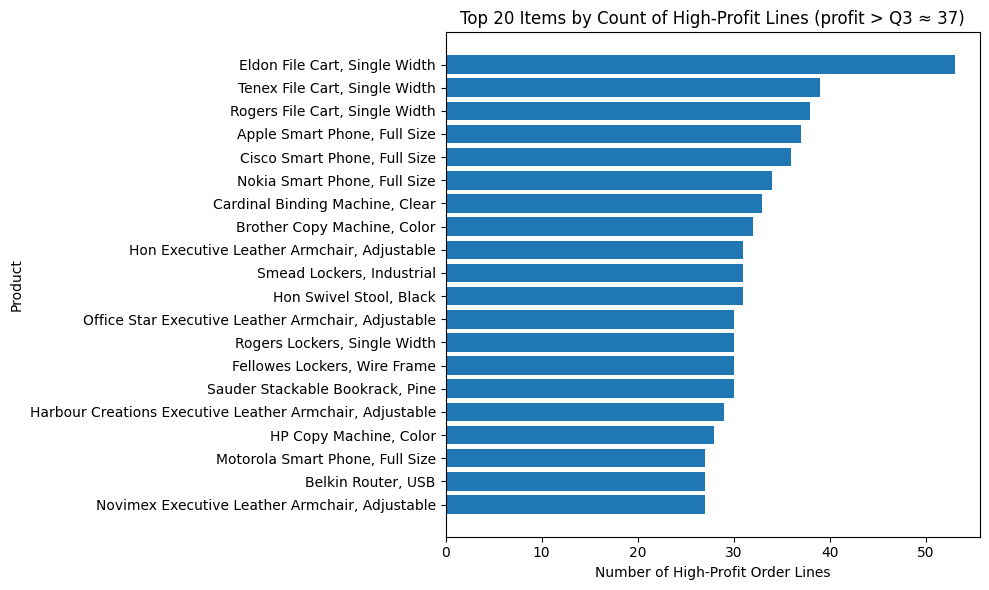

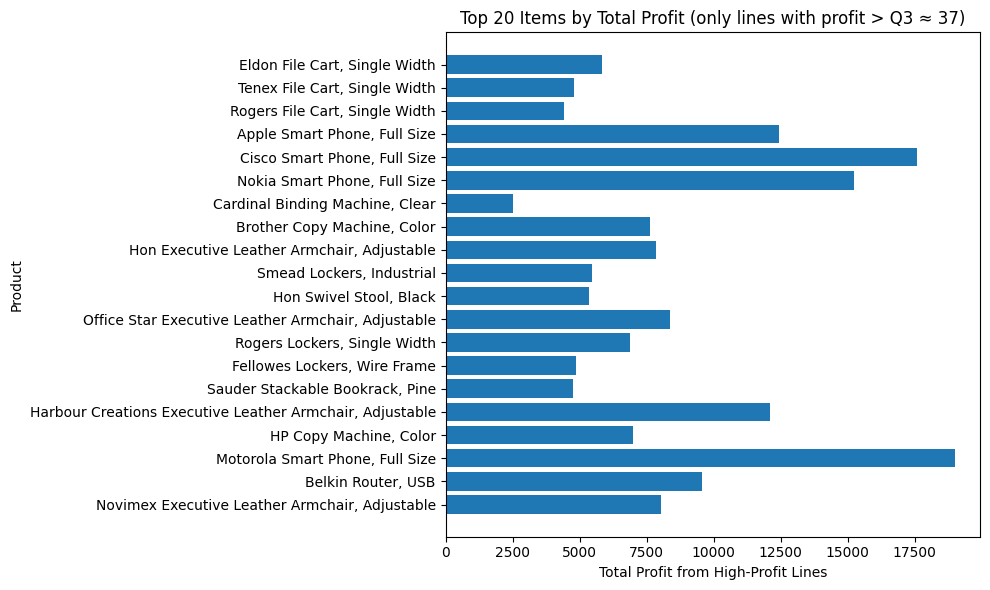


High-profit summary by Category:
                 high_profit_orders  high_profit_total
category                                              
Technology                     4638       900587.77102
Office Supplies                4588       570769.95870
Furniture                      3593       610181.40910

High-profit summary by (Category, Sub-category):
                              high_profit_orders  high_profit_total
category        sub_category                                       
Technology      Phones                      1555       295772.94560
Furniture       Chairs                      1378       222431.57410
Technology      Copiers                     1337       323747.93342
Furniture       Bookcases                   1303       256453.91240
Office Supplies Storage                     1258       155097.38850
Technology      Accessories                 1087       150064.76820
Office Supplies Appliances                   837       197366.49020
Technology      Machines     

In [12]:

df["sales"] = pd.to_numeric(df["sales"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True), errors="coerce")
for col in ["quantity", "discount", "profit", "shipping_cost"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

q75_profit = float(df["profit"].quantile(0.75))
high = df[df["profit"] > q75_profit].copy()

print(f"Q3(profit) threshold ≈ {q75_profit:.2f}")
print(f"High-profit rows: {len(high)} / {len(df)}")

item_high = (
    high.groupby(["product_name", "category", "sub_category"], as_index=False)
        .agg(
            high_profit_orders=("order_id", "count"),
            high_profit_total=("profit", "sum"),
            high_profit_median=("profit", "median"),
            sales_total=("sales", "sum"),
        )
        .sort_values(["high_profit_orders", "high_profit_total"], ascending=False)
)

TOP_N = 20
top_items = item_high.head(TOP_N)

print("\nTop items by count of high-profit order lines:")
print(top_items[["product_name", "category", "sub_category",
                 "high_profit_orders", "high_profit_total", "high_profit_median", "sales_total"]])

plt.figure(figsize=(10, 6))
plt.barh(top_items["product_name"], top_items["high_profit_orders"])
plt.title(f"Top {TOP_N} Items by Count of High-Profit Lines (profit > Q3 ≈ {q75_profit:.0f})")
plt.xlabel("Number of High-Profit Order Lines")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(top_items["product_name"], top_items["high_profit_total"])
plt.title(f"Top {TOP_N} Items by Total Profit (only lines with profit > Q3 ≈ {q75_profit:.0f})")
plt.xlabel("Total Profit from High-Profit Lines")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

cat_high = (
    high.groupby("category")
        .agg(high_profit_orders=("order_id", "count"),
             high_profit_total=("profit", "sum"))
        .sort_values("high_profit_orders", ascending=False)
)
subcat_high = (
    high.groupby(["category", "sub_category"])
        .agg(high_profit_orders=("order_id", "count"),
             high_profit_total=("profit", "sum"))
        .sort_values("high_profit_orders", ascending=False)
)

print("\nHigh-profit summary by Category:")
print(cat_high)

print("\nHigh-profit summary by (Category, Sub-category):")
print(subcat_high.head(20))


berdasarkan data barang top 3 "file cart (elden, tenex, roger)" adalah barang barang dengan kuantitas tinggi yang memiliki profit diatas 25% (profit 37). Akan tetapi barang seperti "smart phone (motorola, apple, cisco, nokia)" memiliki jumlah profit yang lebih tinggi dengan kuantitas yang setara

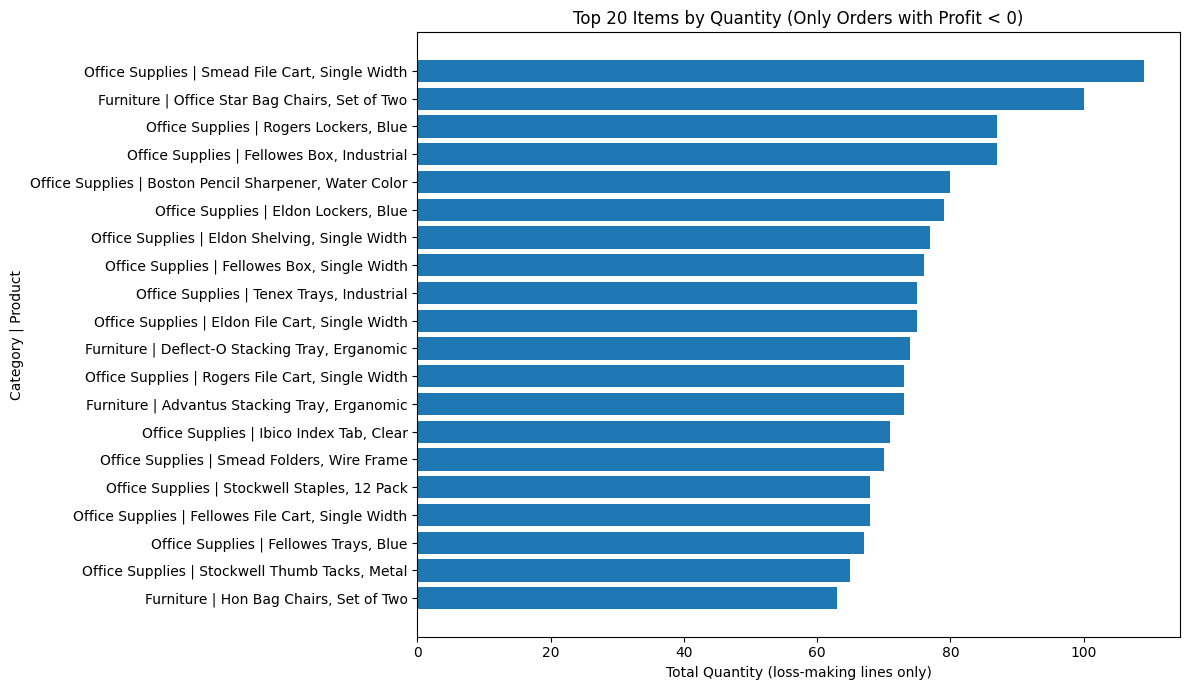

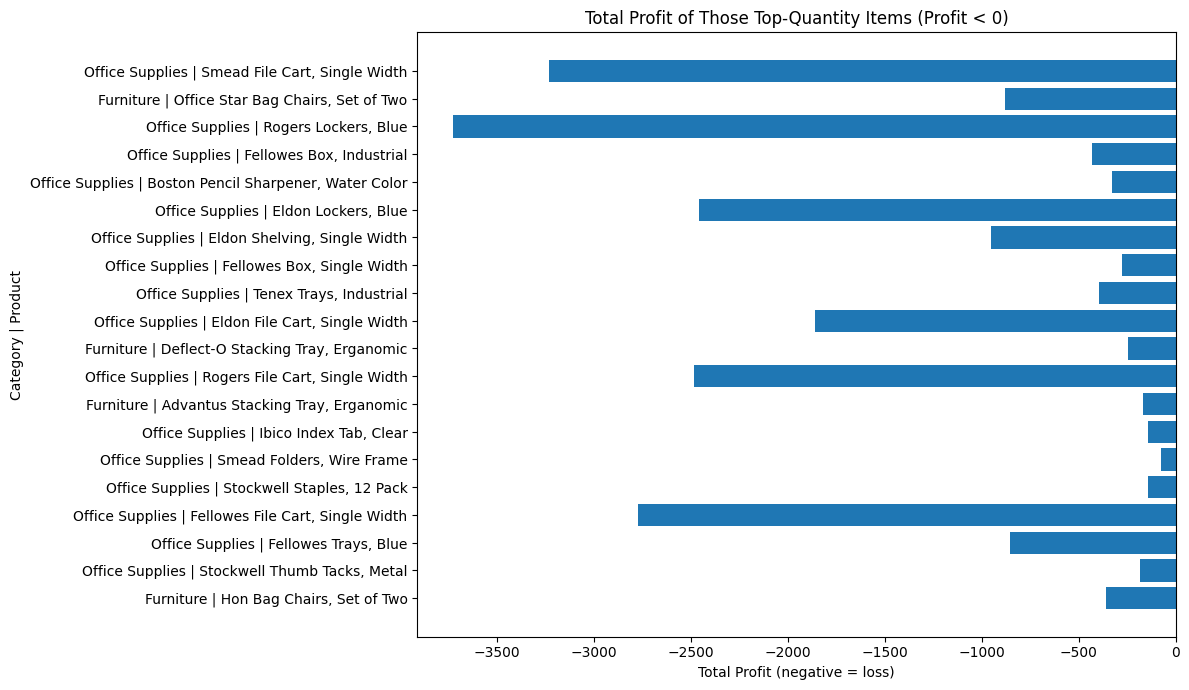

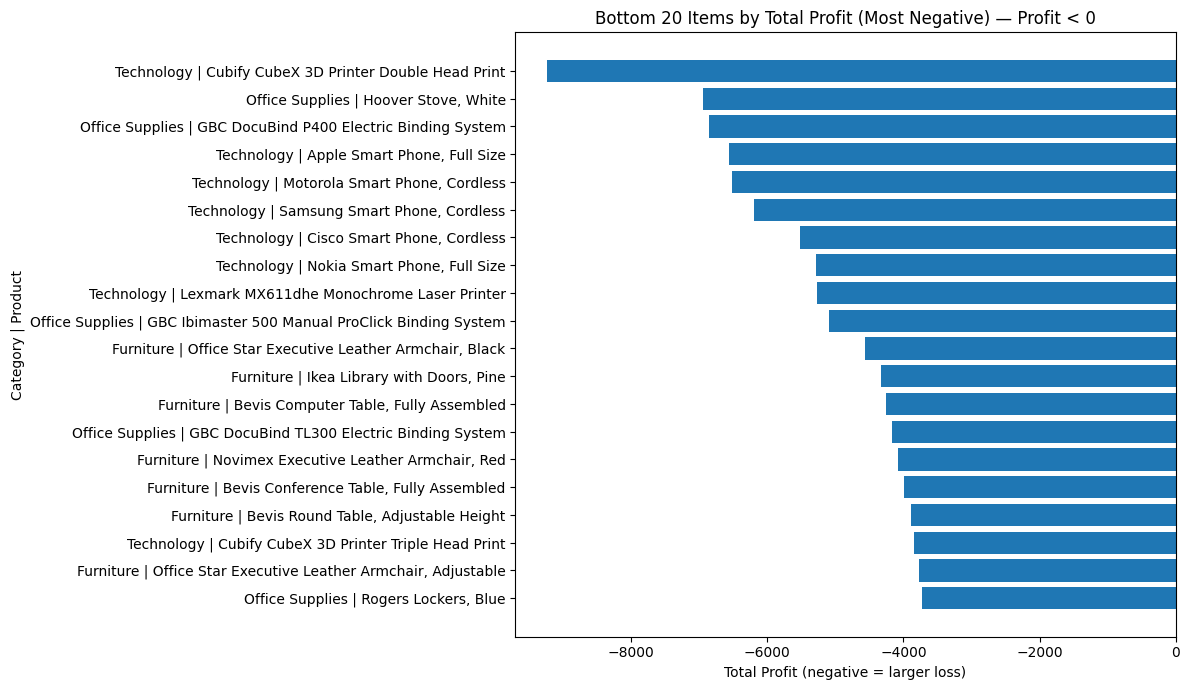

In [18]:
df["sales"] = pd.to_numeric(df["sales"].astype(str).str.replace(r"[^0-9.\-]", "", regex=True), errors="coerce")
for col in ["quantity", "discount", "profit", "shipping_cost"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# --- Filter to loss-making lines (profit < 0) ---
loss_only = df[df["profit"] < 0].copy()

# --- Aggregate by Category + Item ---
agg = (
    loss_only.groupby(["category", "product_name", "sub_category"], as_index=False)
             .agg(
                 orders=("order_id", "count"),
                 total_quantity=("quantity", "sum"),
                 total_profit=("profit", "sum"),
                 avg_profit=("profit", "mean"),
             )
)

# A helper to create readable labels that include the category
def item_label(row):
    return f"{row['category']} | {row['product_name']}"

# 1) Top 20 (by quantity) among items with profit < 0
top_qty = agg.sort_values("total_quantity", ascending=False).head(20).copy()
top_qty["label"] = top_qty.apply(item_label, axis=1)

plt.figure(figsize=(12, 7))
plt.barh(top_qty["label"], top_qty["total_quantity"])
plt.title("Top 20 Items by Quantity (Only Orders with Profit < 0)")
plt.xlabel("Total Quantity (loss-making lines only)")
plt.ylabel("Category | Product")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 2) For those same 20 items: show their total profit (still < 0, so more negative = worse)
plt.figure(figsize=(12, 7))
plt.barh(top_qty["label"], top_qty["total_profit"])
plt.title("Total Profit of Those Top-Quantity Items (Profit < 0)")
plt.xlabel("Total Profit (negative = loss)")
plt.ylabel("Category | Product")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3) Items with the lowest total profit (most negative) among profit < 0
worst_loss = agg.sort_values("total_profit", ascending=True).head(20).copy()
worst_loss["label"] = worst_loss.apply(item_label, axis=1)

plt.figure(figsize=(12, 7))
plt.barh(worst_loss["label"], worst_loss["total_profit"])
plt.title("Bottom 20 Items by Total Profit (Most Negative) — Profit < 0")
plt.xlabel("Total Profit (negative = larger loss)")
plt.ylabel("Category | Product")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Dapat dilihat bahwa barang barang yang memiliki profit bawah Q1 bernilai 0 dalam profit  atau (75% barang yang memiliki profit dibawah 0) terlihat bahwa banyak barang office supplies yang memiliki kuantitas tinggi tapi merugikan. tapi dalam total loss 'technology' memiliki nilai tertinggi untuk total loss. jadi dalam kuantitas besar 'office supplies' memiliki banyak barang yang bikin rugi

1) Office Supplies (kuantitas tinggi tapi sering rugi)

Opsi uji 2–4 minggu (pilih sebagian SKU dulu):

- Batasi diskon untuk SKU yang paling sering muncul di transaksi rugi (top loss-by-quantity).

    - Bundling margin: padukan item “Q1/low-ticket” dengan produk komplementer yang marginnya lebih baik (mis. paper/label/organizer) agar basket margin naik.

    - Atur metode kirim: default ke Standard untuk keranjang kecil; Same Day hanya jika nilai keranjang melewati ambang tertentu.

- Yang dipantau: jumlah order rugi per SKU, perubahan conversion, dan margin per order.

2) Kategori ber-ticket besar (contoh: Technology) — loss per-SKU besar

- Penyesuaian ringan pada harga & cap diskon untuk SKU yang masuk daftar “bottom total loss”.

- Negosiasi vendor/rebate pada SKU yang kerugiannya paling besar.

- Arahkan promosi ke segmen yang lebih “willing-to-pay” (mis. Corporate/Home Office) agar diskon tidak terlalu agresif.

- Yang dipantau: total loss per-SKU, dampak ke volume, dan margin kategori.

3) Menurunkan porsi order non-profit (umum, lintas kategori)

- Flag ringan di proses order: jika estimasi profit_line ≤ 0, tampilkan peringatan/konfirmasi internal sebelum checkout final.

- Cap diskon default (mis. ≤ ~20%) untuk transaksi reguler; diskon lebih tinggi butuh persetujuan singkat (hanya untuk clearance).

- Simulasi ongkir sebelum konfirmasi: pastikan ongkir + diskon tidak membuat profit_line negatif.

- Yang dipantau: proporsi profit ≤ 0 dari seluruh order, rata-rata diskon, dan rerata shipping per order.

4) Monitoring ringan langsung dari notebook

- Tiga daftar mingguan :

    - Top-Qty loss items (SKU volume tinggi namun sering rugi).

    - Bottom total loss items (SKU dengan kerugian kumulatif terbesar).

    - Ringkasan per kategori/region (untuk melihat konsentrasi loss).

- KPI sederhana :

    - Penurunan proporsi order profit ≤ 0 (target penurunan bertahap).

    - Penurunan total loss pada 10 SKU terburuk.

    - Stabil/naiknya margin kategori prioritas.